# Import the dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
import pandas as pd
df = pd.read_csv('/Users/priya/US_Accidents.csv', encoding='utf-8')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


# About the Dataset:

Source data used for the analysis is collection of all the realtime traffic accidents reported by number of traffic monitoring APIs over the period from Feb 2016 till Dec 2020. There are 4.2 million accident records in the dataset and 49 columns contributing to variety of information of each accidents.

For understanding the data better and for further analysis , I have all classified all the features from the data into below subject categories:

### Record/source API identifiers :

    ID, Source, TMC 

### Accident properties :

    Severity, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi)

### Location properties :

    Description, Number, Street, Side, City, County, State, Zipcode, Country, Timezone, Airport_Code, 

### Weather Condition Properties :

    Weather_Timestamp, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight

### Nearby landmark properties :

    Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop,


## Clean the Dataset

In [3]:
#A reusable function to run on any dataframe to perform quick basic sanity of the data.
from pprint import pprint
def sanity_check(df):
    pprint('-'*70)
    pprint('No. of Row : {0[0]}        No. of Columns : {0[1]}'.format(df.shape))
    pprint('-'*70)
    data_profile = pd.DataFrame(df.dtypes.reset_index()).rename(columns = {'index' : 'Attribute' ,
                                                                           0 : 'DataType'}).set_index('Attribute')
    data_profile = pd.concat([data_profile,df.isnull().sum()], axis=1).rename(columns = {0 : 'Missing Values'})
    data_profile = pd.concat([data_profile,df.nunique()], axis=1).rename(columns = {0 : 'Unique Values'})
    pprint(data_profile)
    pprint('-'*70)

In [4]:
sanity_check(df)

'----------------------------------------------------------------------'
'No. of Row : 4232541        No. of Columns : 49'
'----------------------------------------------------------------------'
                      DataType  Missing Values  Unique Values
Attribute                                                    
ID                      object               0        4232541
Source                  object               0              3
TMC                    float64         1516064             21
Severity                 int64               0              4
Start_Time              object               0        3657563
End_Time                object               0        3775982
Start_Lat              float64               0        1371599
Start_Lng              float64               0        1371288
End_Lat                float64         2716477         587824
End_Lng                float64         2716477         599916
Distance(mi)           float64               0          1461

In [5]:
df.Weather_Condition.unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

#### Our analysis has more focus on locations and time of the accidents. The columns 'City' has 137 rows null (which is very low compared to total row count). We will remove these rows from dataset
Similarly, Sunrise_sunset and Description columns has less than 10 rows with null rows, dropping those rows from dataset.

In [6]:
df.dropna(subset=['City','Sunrise_Sunset','Description'], inplace=True)

#### Converting the date columns from object datatypes to date datatype and have new colums year, month and time

In [7]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [8]:
df['year'] = pd.DatetimeIndex(df['Start_Time']).year
df['month'] = pd.DatetimeIndex(df['Start_Time']).month
df['time'] = pd.DatetimeIndex(df['Start_Time']).time

In [9]:
import datetime
df['Start_Time']= pd.to_datetime(df['Start_Time'])
df['hour']= df['Start_Time'].dt.hour
df['year']= df['Start_Time'].dt.year
df['month']= df['Start_Time'].dt.month
df['week']= df['Start_Time'].dt.week
#df['day']= df['Start_Time'].dt.weekday_name
df['quarter']= df['Start_Time'].dt.quarter
df['time_zone']= df['Start_Time'].dt.tz
df['time']= df['Start_Time'].dt.time

In [10]:
sanity_check(df)

'----------------------------------------------------------------------'
'No. of Row : 4232398        No. of Columns : 56'
'----------------------------------------------------------------------'
                             DataType  Missing Values  Unique Values
Attribute                                                           
ID                             object               0        4232398
Source                         object               0              3
TMC                           float64         1515981             21
Severity                        int64               0              4
Start_Time             datetime64[ns]               0        3634447
End_Time               datetime64[ns]               0        3755722
Start_Lat                     float64               0        1371560
Start_Lng                     float64               0        1371251
End_Lat                       float64         2716417         587802
End_Lng                       float64        

## Top 10 States and Top 10 Cities with most severe accidents

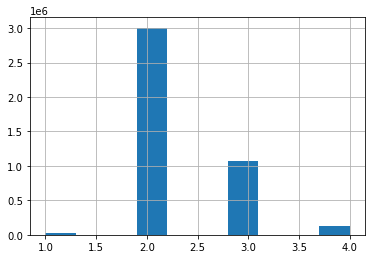

In [11]:
#How many incidences with severity 1,2,3,4; Severity cases 2 are highest
import matplotlib.pyplot as plt 
# plot a histogram  
df['Severity'].hist(bins=10) 

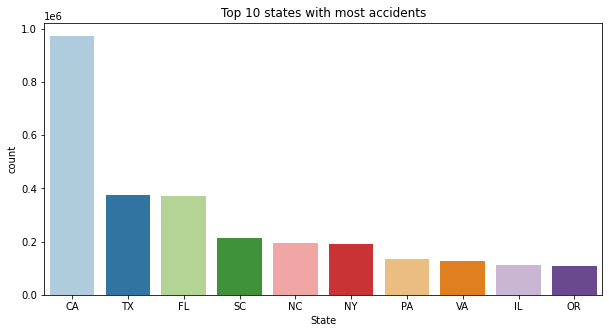

In [12]:
fig, axes = plt.subplots(1, figsize=(10, 5))
plt.title('Top 10 states with most accidents')
sns.countplot('State',data=df,order = df['State'].value_counts().iloc[:10].index,palette=sns.color_palette("Paired"))

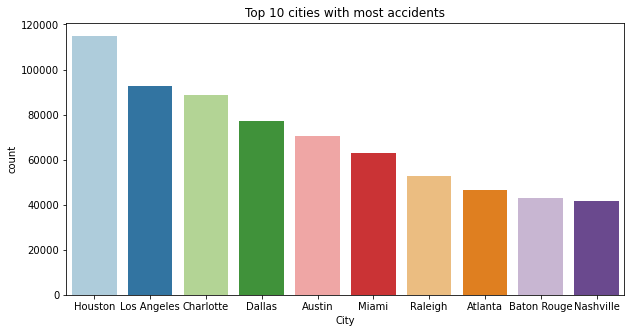

In [13]:
fig, axes = plt.subplots(1, figsize=(10, 5))
plt.title('Top 10 cities with most accidents')
sns.countplot('City',data=df,order = df['City'].value_counts().iloc[:10].index,palette=sns.color_palette("Paired"))

## Accidents trends on time series

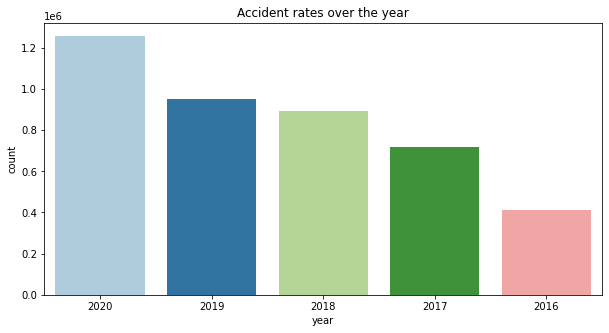

In [14]:
fig, axes = plt.subplots(1, figsize=(10, 5))
plt.title('Accident rates over the year')
sns.countplot('year',data=df,order = df['year'].value_counts().index,palette=sns.color_palette("Paired"))

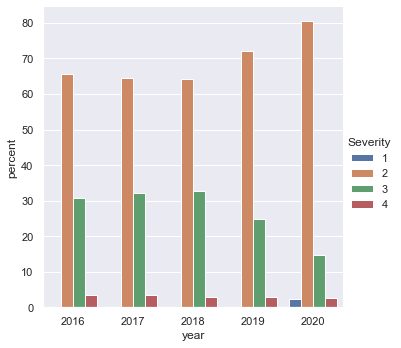

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)



x,y = 'year', 'Severity'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

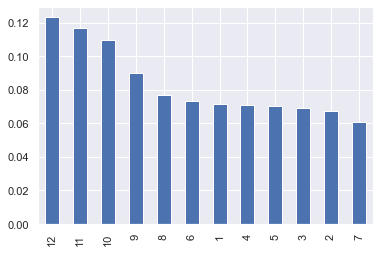

In [16]:
df['month'].value_counts(normalize=True).plot(kind='bar')

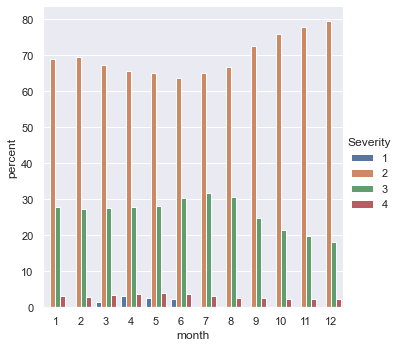

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)



x,y = 'month', 'Severity'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

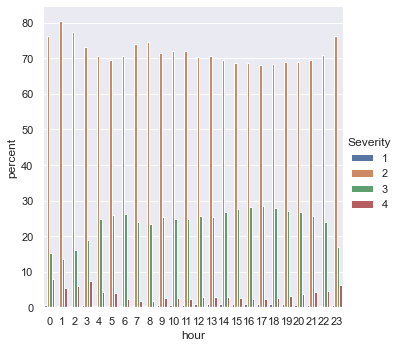

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)



x,y = 'hour', 'Severity'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

Text(0, 0.5, 'count of accidents')

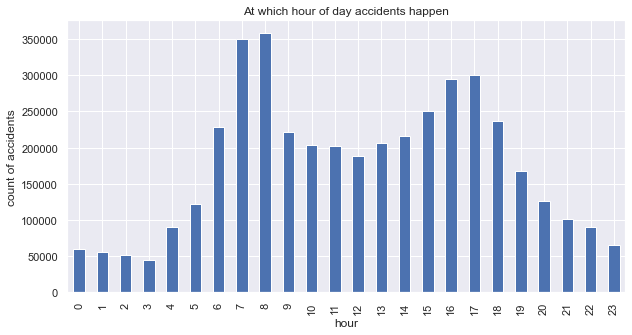

In [19]:
#Graph Shows at which time of the day the accidents are maximum, early morning during the office going time
plt.figure(figsize =(10,5))
df.groupby(['hour']).size().plot.bar()
plt.title('At which hour of day accidents happen')
plt.ylabel('count of accidents')

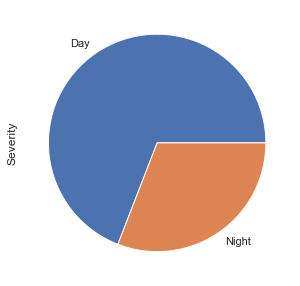

In [20]:
#When do accidents happen the most 
plt.figure(figsize =(10,5))
df.groupby(['Sunrise_Sunset'])['Severity'].size().sort_values(ascending=False).plot.pie()

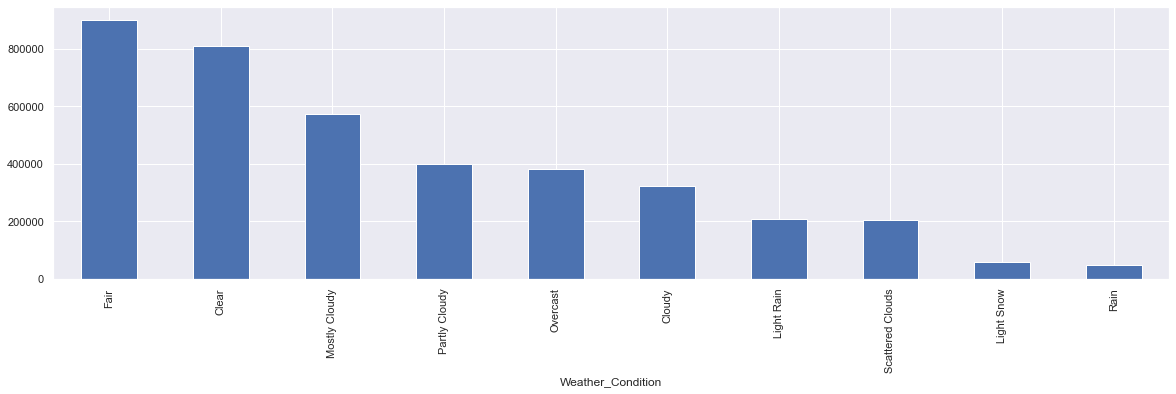

In [21]:
#How was the weather conditions during the accidents? Mostly clear...
plt.figure(figsize =(20,5))
df.groupby(['Weather_Condition']).size().sort_values(ascending=False).head(10).plot.bar()

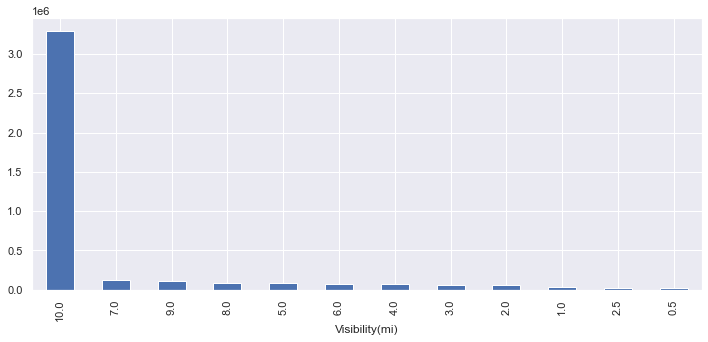

In [22]:
#How was the visibility during accidents? Max accidents happened when the visibiilty was >10 miles
plt.figure(figsize =(12,5))
df.groupby(['Visibility(mi)']).size().sort_values(ascending=False).head(12).plot.bar()

In [34]:
cols = [3,4]
df.drop(df.columns[cols],axis=1,inplace=True)

In [35]:
df.head()

,Severity,Start_Time,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year,month,time,hour,week,quarter,time_zone
512217,2,2020-12-31 10:47:49,NY,32.0,23.0,64.0,29.56,10.0,W,13.0,...,Day,Day,Day,2020,12,10:47:49,10,53,4,None
512218,2,2020-12-31 13:24:43,NY,34.0,27.0,67.0,29.59,10.0,W,9.0,...,Day,Day,Day,2020,12,13:24:43,13,53,4,None
512219,3,2020-12-31 13:29:34,NY,37.0,30.0,54.0,29.50,10.0,W,9.0,...,Day,Day,Day,2020,12,13:29:34,13,53,4,None
512220,2,2020-12-31 04:35:33,MA,45.0,37.0,80.0,29.86,10.0,SW,22.0,...,Night,Night,Night,2020,12,04:35:33,4,53,4,None
512221,2,2020-12-31 05:11:11,MA,45.0,37.0,80.0,29.86,10.0,SW,22.0,...,Night,Night,Night,2020,12,05:11:11,5,53,4,None


In [26]:
df.drop(df[df['year'] < 2019].index, inplace = True)

In [24]:
print(df.shape)

(4232398, 56)


In [37]:
df.to_csv('US_Accidents_New.csv')

In [36]:
sanity_check(df)

'----------------------------------------------------------------------'
'No. of Row : 2211789        No. of Columns : 36'
'----------------------------------------------------------------------'
                             DataType  Missing Values  Unique Values
Attribute                                                           
Severity                        int64               0              4
Start_Time             datetime64[ns]               0        1756329
State                          object               0             49
Temperature(F)                float64           51060            686
Wind_Chill(F)                 float64          192644            964
Humidity(%)                   float64           54599            100
Pressure(in)                  float64           42075           1020
Visibility(mi)                float64           51493             70
Wind_Direction                 object           58523             24
Wind_Speed(mph)               float64        